In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Subset, DataLoader, Dataset
from pathlib import Path

from nn.cnn import CIFAR8TinyCNN
from dataset.cifar import CIFAR8

In [12]:
# Set the seed for reproducibility
torch.manual_seed(0)

# Check for CUDA (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = Path('c:/Users/Fran/Documents/GitHub/raw_royal_flush/data/cifar100_subset.pth').resolve()
export = Path('c:/Users/Fran/Documents/GitHub/raw_royal_flush/export').resolve()

if not export.exists():
    export.mkdir()

print("Data-set file:", data.is_file(), data)
print("Export folder:", export.is_dir(), export)

Data-set file: True C:\Users\Fran\Documents\GitHub\raw_royal_flush\data\cifar100_subset.pth
Export folder: True C:\Users\Fran\Documents\GitHub\raw_royal_flush\export


# Initialization

In [16]:
transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
# Create the dataset
cifar8_train = CIFAR8(root=data.parent.resolve(), train=True, transform=transform, download=True)
cifar8_test = CIFAR8(root=data.parent.resolve(), train=False, transform=transform, download=True)

# Create the dataloaders
train_loader = DataLoader(cifar8_train, batch_size=8, shuffle=True)
test_loader = DataLoader(cifar8_test, batch_size=8, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# Initialize the network
net = CIFAR8TinyCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## [Optional] Verify images and labels

torch.Size([8, 3, 32, 32]) torch.Size([8])
['tractor', 'shark', 'tractor', 'ray', 'shark', 'bicycle', 'ray', 'tractor']


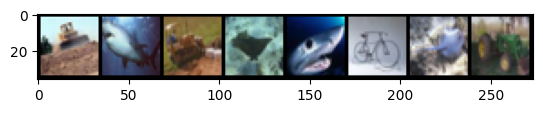

In [35]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape, labels.shape)
print([cifar8_train.selected_classes_names[lbl.item()] for lbl in labels])

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))

# Create the dataloaders again
train_loader = DataLoader(cifar8_train, batch_size=8, shuffle=True)
test_loader = DataLoader(cifar8_test, batch_size=8, shuffle=False)

# Training

In [18]:
def train_network(train_loader: DataLoader, epochs: int = 1, mini_batches_to_print: int = 100):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # print every n mini-batches:
            if mini_batches_to_print > 0 and i % mini_batches_to_print == mini_batches_to_print - 1:  
                print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / mini_batches_to_print}")
                running_loss = 0.0

train_network(train_loader=train_loader, epochs=20)

[1, 100] loss: 2.0763000798225404
[1, 200] loss: 2.0802544021606444
[1, 300] loss: 2.0796247696876526
[1, 400] loss: 2.0780746865272524
[1, 500] loss: 2.076258080005646
[2, 100] loss: 2.073091230392456
[2, 200] loss: 2.0692841839790344
[2, 300] loss: 2.06355672121048
[2, 400] loss: 2.0530053329467775
[2, 500] loss: 2.0275898694992067
[3, 100] loss: 1.949827847480774
[3, 200] loss: 1.7776189386844634
[3, 300] loss: 1.7424810755252838
[3, 400] loss: 1.6830006849765777
[3, 500] loss: 1.6619387972354889
[4, 100] loss: 1.6250603520870208
[4, 200] loss: 1.6306540155410767
[4, 300] loss: 1.6328139317035675
[4, 400] loss: 1.5875725662708282
[4, 500] loss: 1.5646138191223145
[5, 100] loss: 1.5194228792190552
[5, 200] loss: 1.5672925651073455
[5, 300] loss: 1.5338829952478408
[5, 400] loss: 1.5369725704193116
[5, 500] loss: 1.5204084503650666
[6, 100] loss: 1.5114169907569885
[6, 200] loss: 1.5537639236450196
[6, 300] loss: 1.4365163952112199
[6, 400] loss: 1.4453312265872955
[6, 500] loss: 1.46

# Old junk

## First old junk

In [ ]:
selected_classes = {'bicycle': 8, 'dolphin': 30, 'motorcycle': 48, 'ray': 67, 'shark': 73, 'tank': 85, 'tractor': 89, 'trout': 91} # original
classes = {'bicycle': 4, 'dolphin': 3, 'motorcycle': 5, 'ray': 0, 'shark': 2, 'tank': 6, 'tractor': 7, 'trout': 1} # new

In [3]:
transform = transforms.Compose(
        # [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
        [transforms.ToTensor()]
    )

full_dataset = torchvision.datasets.CIFAR100(
        root=data.parent.resolve(), train=True, download=True, transform=transform
    )

Files already downloaded and verified


In [4]:
# Define class indices for the selected superclasses
# selected_classes = {
#     "aquatic_mammals": ["beaver", "dolphin", "otter", "seal", "whale"],
#     "fish": ["aquarium fish", "flatfish", "ray", "shark", "trout"],
#     "vehicles_1": [
#         "bicycle",
#         "bus",
#         "motorcycle",
#         "pickup truck",
#         "train"
#     ],
#     "vehicles_2": [
#         "lawn-mower",
#         "rocket",
#         "streetcar",
#         "tank",
#         "tractor"
#     ],
# }
selected_classes_names = [
    "ray", "trout", 
    "shark", "dolphin",
    "bicycle", "motorcycle",
    "tank", "tractor"
]

selected_classes = {k:v for (k, v) in full_dataset.class_to_idx.items() if k in selected_classes_names}
selected_classes_new_idx = {k:selected_classes_names.index(k) for (k, v) in full_dataset.class_to_idx.items() if k in selected_classes_names}
print(selected_classes)
print(selected_classes_new_idx)

{'bicycle': 8, 'dolphin': 30, 'motorcycle': 48, 'ray': 67, 'shark': 73, 'tank': 85, 'tractor': 89, 'trout': 91}
{'bicycle': 4, 'dolphin': 3, 'motorcycle': 5, 'ray': 0, 'shark': 2, 'tank': 6, 'tractor': 7, 'trout': 1}


In [5]:
selected_classes_inv = {v:k for (k, v) in full_dataset.class_to_idx.items() if k in selected_classes_names}

indices = [
    idx
    for idx, lbl in enumerate(full_dataset.targets)
    if lbl in list(selected_classes.values())
]

new_labels = [
    selected_classes_new_idx[selected_classes_inv[lbl]]
    for lbl in full_dataset.targets
    if lbl in list(selected_classes.values())
]

print(np.unique(new_labels))
print(len(indices), len(new_labels))

[0 1 2 3 4 5 6 7]
4000 4000


In [6]:
# Create a subset from the full dataset
subset_dataset = Subset(full_dataset, indices)

# Save the subset dataset
torch.save(subset_dataset, data)

In [200]:
dataloader = torch.utils.data.DataLoader(subset_dataset, batch_size=1)

In [201]:
print(dataloader.dataset.dataset.targets[:10])
len(subset_dataset.dataset)

[19, 29, 0, 11, 1, 86, 90, 28, 23, 31]


50000

## Load Subset

In [140]:
class CIFAR100Subset8(Dataset):
    def __init__(self, dataset, labels):
        self.dataset = dataset
        self.labels = labels
        self.class_to_idx = {'bicycle': 4, 'dolphin': 3, 'motorcycle': 5, 'ray': 0, 'shark': 2, 'tank': 6, 'tractor': 7, 'trout': 1}

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]
        label = self.labels[idx]
        return image, label


In [7]:
# Set the seed for reproducibility
torch.manual_seed(0)

# Check for CUDA (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the subset dataset
subset_dataset = torch.load(data)

# DataLoader setup
train_loader = DataLoader(subset_dataset, batch_size=8, shuffle=True, num_workers=2)

In [142]:
def get_class_name(index: int):
    for k, v in selected_classes_new_idx.items():
        if index == v:
            return k
    return -1


In [8]:
# Initialize the network
net = CIFAR8TinyCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [206]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [210]:
print(labels)
class_mapping = {
    8: 4,   # 'bicycle'
    30: 3,  # 'dolphin'
    48: 5,  # 'motorcycle'
    67: 0,  # 'ray'
    73: 2,  # 'shark'
    85: 6,  # 'tank'
    89: 7,  # 'tractor'
    91: 1   # 'trout'
}
labels.apply_(lambda x: class_mapping[x])

tensor([ 8,  8, 85, 48, 91, 91, 85, 91])


tensor([4, 4, 6, 5, 1, 1, 6, 1])

In [211]:
labels

tensor([4, 4, 6, 5, 1, 1, 6, 1])

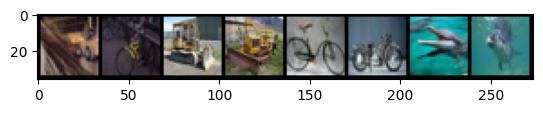

[-1, -1, -1, -1, -1, -1, -1, -1]


In [145]:
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))
print([get_class_name(l) for l in labels])

In [12]:
class_mapping = {
    8: 4,   # 'bicycle'
    30: 3,  # 'dolphin'
    48: 5,  # 'motorcycle'
    67: 0,  # 'ray'
    73: 2,  # 'shark'
    85: 6,  # 'tank'
    89: 7,  # 'tractor'
    91: 1   # 'trout'
}

# Training the network
def train_network(epochs: int = 1):
    mini_batches_to_print = 100
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            labels.apply_(lambda x: class_mapping[x])
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if mini_batches_to_print > 0 and i % mini_batches_to_print == mini_batches_to_print - 1:  # print every n mini-batches
                print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / mini_batches_to_print}")
                running_loss = 0.0

        # Here you could add code to share parameters using SPADE messages

In [15]:
train_network(50)  # Train for n epochs

[1, 100] loss: 0.14197130269138142
[1, 200] loss: 0.20023415213858242
[1, 300] loss: 0.15731907854788005
[1, 400] loss: 0.11888592093717307
[1, 500] loss: 0.20502856101491487
[2, 100] loss: 0.06802968055824749
[2, 200] loss: 0.1307741326338146
[2, 300] loss: 0.12332986464665736
[2, 400] loss: 0.10603747212328017
[2, 500] loss: 0.1520841120649129
[3, 100] loss: 0.1014351325109601
[3, 200] loss: 0.1467149001872167
[3, 300] loss: 0.18529125921078957
[3, 400] loss: 0.10433198739599903
[3, 500] loss: 0.10376711697666906
[4, 100] loss: 0.06528913314192324
[4, 200] loss: 0.0898040134832263
[4, 300] loss: 0.09478119421983137
[4, 400] loss: 0.10011581672704778
[4, 500] loss: 0.17414885911741293
[5, 100] loss: 0.11726585556112695
[5, 200] loss: 0.11323425214388408
[5, 300] loss: 0.2034191299090162
[5, 400] loss: 0.14183212138304951
[5, 500] loss: 0.10646262321824906
[6, 100] loss: 0.07973975187516771
[6, 200] loss: 0.09761606033775024
[6, 300] loss: 0.06639924867660739
[6, 400] loss: 0.095754965

## new age

In [157]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

class_mapping = {
    8: 4,   # 'bicycle'
    30: 3,  # 'dolphin'
    48: 5,  # 'motorcycle'
    67: 0,  # 'ray'
    73: 2,  # 'shark'
    85: 6,  # 'tank'
    89: 7,  # 'tractor'
    91: 1   # 'trout'
}

def load_filtered_dataset(batch_size=32):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
    full_trainset = datasets.CIFAR100(root=data.parent.resolve(), train=True, download=True, transform=transform)
    full_testset = datasets.CIFAR100(root=data.parent.resolve(), train=False, download=True, transform=transform)

    # Adjust this method to properly filter and remap class labels
    def filter_classes(dataset):
        filtered_indices = [idx for idx, target in enumerate(dataset.targets) if target in class_mapping]
        filtered_targets = [class_mapping[dataset.targets[idx]] for idx in filtered_indices]
        return Subset(dataset, filtered_indices), filtered_targets

    # Apply the filtering
    train_subset, train_subset_targets = filter_classes(full_trainset)
    test_subset, test_subset_targets = filter_classes(full_testset)

    # Update the targets in the subsets
    train_subset.dataset.targets = train_subset_targets
    test_subset.dataset.targets = test_subset_targets

    # Create data loaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Load the data
train_loader, test_loader = load_filtered_dataset()

Files already downloaded and verified
Files already downloaded and verified


In [158]:
# Initialize the network
model = CIFAR8TinyCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [168]:
len(train_loader.dataset.dataset)

50000

In [160]:
num_epochs = 1
for epoch in range(num_epochs): 
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

IndexError: list index out of range

In [ ]:
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))
print([get_class_name(l) for l in labels])

## new age 2

In [3]:
from dataset.cifar import CIFAR8

In [4]:
transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
# Create the dataset
cifar8_train = CIFAR8(root=data.parent.resolve(), train=True, transform=transform, download=True)
cifar8_test = CIFAR8(root=data.parent.resolve(), train=False, transform=transform, download=True)

# Example of using DataLoader to create batches
from torch.utils.data import DataLoader
train_loader = DataLoader(cifar8_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar8_test, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
cifar8_train.data.shape

(4000, 32, 32, 3)